<a href="https://colab.research.google.com/github/mratanusarkar/Learning-DeepLearning/blob/main/Neural%20Networks%20-%20Zero%20to%20Hero/building%20neural%20networks/04.%20dummy%20model%20-%20dataset%20&%20loss_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing code from the previous notebook as module

In [1]:
# we have converted all the classes we saw before into a module
# so that it's easier to work with.
# now let's build a dummy MLP and look at the processes that goes in creating, training and using a nn

In [2]:
!git clone https://github.com/mratanusarkar/Learning-DeepLearning.git &> /dev/null
%cd /content/Learning-DeepLearning/Neural\ Networks\ -\ Zero\ to\ Hero
!python setup.py install &> /dev/null

/content/Learning-DeepLearning/Neural Networks - Zero to Hero


In [3]:
import random
random.seed(2023)

from micrograd.engine import Value
from micrograd.nn import NoobMLP
from micrograd.visualize import draw_dot

# Creating MLP

In [4]:
# let's init a mlp (as before) with 3 inputs and 2 hidden layer and 1 output layer that outputs 1 node
n = NoobMLP(3, [4, 4, 1], 'classifier')

In [5]:
# let's make a single forward with a random data to initialize the model and see the metwork
x = [2.0, 3.0, -1.0]
out = n(x)
print(out)

[Value(label=classifier L:3 N:0 : out, data=0.8628588505241309, grad=0.0)]


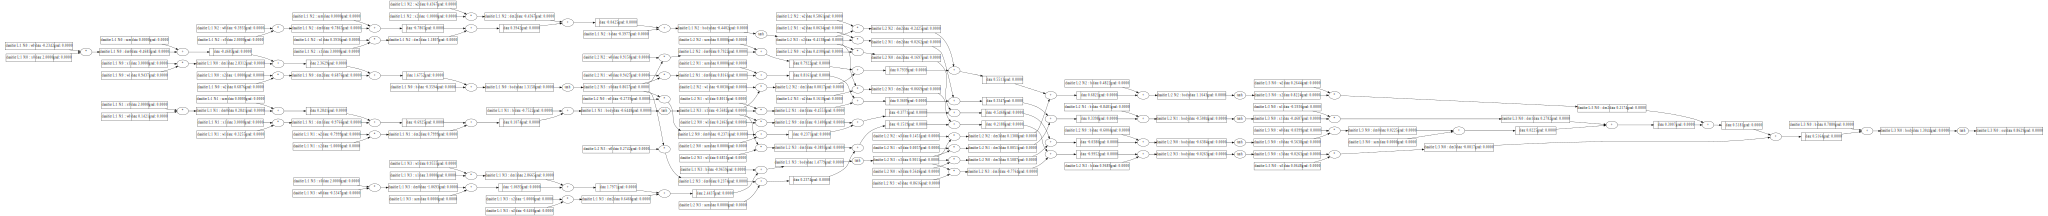

In [6]:
draw_dot(out[0])

# Creating a dummy dataset

In [7]:
# let's create a simple dataset with 4 examples (x) and 4 target (y)
# so the model would be a simple binary classifier

In [8]:
data = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

target = [1.0, -1.0, -1.0, 1.0]

In [9]:
# let's get the predictions for the current xs with the current model (assigned with random weights & biases)
ypred = [n(x)[0] for x in data]
for i in range(len(target)):
    print("pred:", ypred[i].data, "\ttarget:", target[i])

pred: 0.8628588505241309 	target: 1.0
pred: 0.8466295897654459 	target: -1.0
pred: 0.9060011788051066 	target: -1.0
pred: 0.863800038287193 	target: 1.0


In [10]:
# so we see the model is throwing garbage as output
# we want it to match it's predictions as close to the target for each training examples

# for example, we want the 1st pred value to go higher to 1.0. 
# where as for 2nd pred, we want the value to go lower to reach -1.0
# and so on...

In [11]:
# so how do we do that? how do we change or tune the weights & biases to better predict the desired targets?
# the trick used on DL to achieve this, is to come up with a single number that measures the total performance of our nn
# and we call the single number: "loss", and the function that calculates/evaluates/determines the loss is called "loss function"

# Loss Function

In [12]:
# there are many ways, multiple methods to do this
# and each loss function is chosen based on the problem at hand or the nn architecture
# in this case, let's go with the simplest of them all, the "mean squared error loss"

# as of now our model is not at all predicting close to the targets, so we expect a bigger loss value

In [13]:
# mean sq err loss = difference between the predicted output (yout) and the target ground truth (ygt), and we square the difference, sum them and average them
# in short, "mse = [Σ(yout-ygt)^2]/n"

In [14]:
# let's take a look at the losses individually
[(yout - ygt)**2 for ygt, yout in zip(target, ypred)]

[Value(label=Null, data=0.018807694879562666, grad=0.0),
 Value(label=Null, data=3.410040841797299, grad=0.0),
 Value(label=Null, data=3.6328404936064556, grad=0.0),
 Value(label=Null, data=0.0185504295705701, grad=0.0)]

In [15]:
# we see more losses where the pred is hugely deviated from the target, and vice versa
# and the sq removes the sign, and get a positive number of measure

In [16]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(target, ypred)) / 4
loss.label='mse loss'
print(loss)

Value(label=mse loss, data=1.7700598649634718, grad=0.0)


In [17]:
# now using this loss information, if we backpropagate, we will have each node with a grad information!!!
# and as we saw in the "04. expression graph - backward pass.ipynb" notebook,
# it's the same thing here, but on a larger scale!

# as the grad in each node tells us, which way to move, to change the output value of the expression graph
# imagine the same case here, where we can use the grad info on our model parameters (w & b), and move the values in such a way
# that it impacts the loss. so to move the loss down, we move w&b in the direction of grad, down hill !!!
# and that's esentially nothing but training our model on the input data!!!!!

In [18]:
# let's see the hugeeeee expression graph of our loss (with 4 example training data)
# just imagine what will it be for billions of training data with millions of model parameters! 
# (I can't even imagine, my system will blast! <insert blast meme here>)

In [19]:
loss.backward()

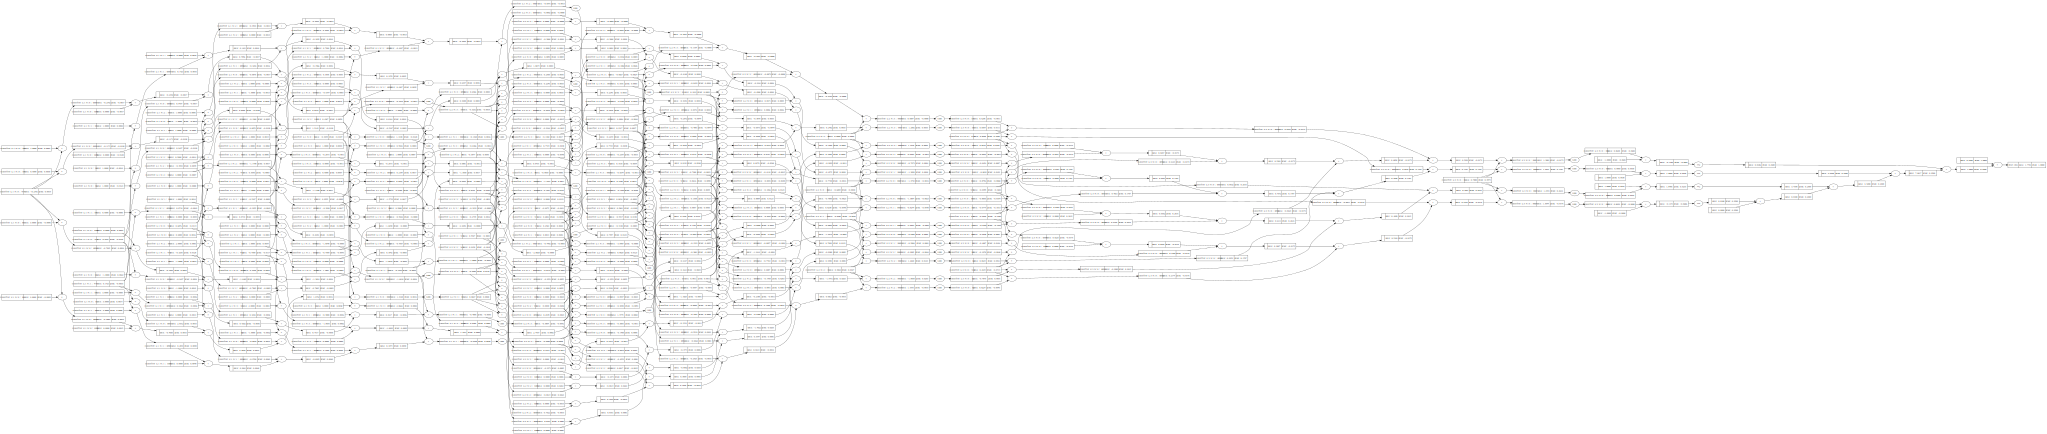

In [20]:
# and... here it goes... BOOM !!
draw_dot(loss)

In [21]:
# we can see all the 4 forward passes and loss calculation in the expression, followed by each nn graph and the grads for each nodes!

In [22]:
# as said above, none of the grads are important to us except the model parameters (ws & bs)
# because the others are no in our hands, they are inputs... we can only change the model params to tarin the model!